# Pymaceuticals Inc.
---

### Analysis

- Capomulin showed the most promise out of all the drug regimens.
- Looking at the box plots, you can visually see that Capomulin had the smallest difference between the upper and lower bound values. This indicates that the mice tested with Capomulin yielded results that were much closer to each other.
- A look at the individual line graphs of the mice tested with Capomulin shows that most of the mice's tumors significantly shrunk compared to their original volumes. 
 

In [80]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_data = pd.merge(mouse_metadata , study_results, on = "Mouse ID")

# Display the data table for preview
merge_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [81]:
# Checking the number of mice.
numMice = len(merge_data["Mouse ID"].unique())
numMice

249

In [82]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# declare a str variable
dupeMouse = str

#use duplicated() function to find duplicates in the dataframe
dupe = merge_data.duplicated()

#find the duplicated record by looking for the true value
x=0
for i in dupe:
    if i == True:
        dupeMouse = x
    x += 1

#save the mouse id of the duplicated record    
mouseID = str(merge_data.iloc[dupeMouse,0])


#print results
print(f"Duplicate found at row {dupeMouse}. Mouse ID = {mouseID}")



Duplicate found at row 909. Mouse ID = g989


In [83]:
# Optional: Get all the data for the duplicate mouse ID. 

#show data of duplicated mouse ID
dupeData = merge_data.loc[merge_data["Mouse ID"]==str(mouseID)]
dupeData


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [101]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#get the indexes of the duplicate mouse
dupeDataIndex = dupeData.index

#drop all data by index
cleanData = merge_data.drop(dupeDataIndex)
cleanData



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [85]:
# Checking the number of mice in the clean DataFrame.
len(cleanData["Mouse ID"].unique())

248

## Summary Statistics

In [86]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

#group by data regimen
drugRegim = cleanData.groupby("Drug Regimen")

#get the mean of tumor volume by groupby
drug_mean = pd.DataFrame(drugRegim["Tumor Volume (mm3)"].mean()).rename(columns={"Tumor Volume (mm3)":"Mean Tumor Volume"})

#get the median of tumor volume by groupby
drug_median = pd.DataFrame(drugRegim["Tumor Volume (mm3)"].median()).rename(columns={"Tumor Volume (mm3)":"Median Tumor Volume"})

#get the variance of tumor volume by groupby
drug_var = pd.DataFrame(drugRegim["Tumor Volume (mm3)"].var()).rename(columns={"Tumor Volume (mm3)":"Tumor Volume Variance"})

#get the standard deviation of tumor volume by groupby
drug_std = pd.DataFrame(drugRegim["Tumor Volume (mm3)"].std()).rename(columns={"Tumor Volume (mm3)":"Tumor Volume Std. Dev."})

#get the SEM of tumor volume by groupby
drug_sem = pd.DataFrame(drugRegim["Tumor Volume (mm3)"].sem()).rename(columns={"Tumor Volume (mm3)":"Tumor Volume Std. Err."})


#merge all lists into 1 dataframe 
drug_stats = pd.merge(drug_mean, drug_median, on = "Drug Regimen")
drug_stats = pd.merge(drug_stats, drug_var, on = "Drug Regimen")
drug_stats = pd.merge(drug_stats, drug_std, on = "Drug Regimen")
drug_stats = pd.merge(drug_stats, drug_sem, on = "Drug Regimen")
drug_stats



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [87]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
#import numpy
import numpy as np

#use numpy to get the statistics table of the groupby
numpyDrug = drugRegim["Tumor Volume (mm3)"].agg([np.mean, np.median, np.var, np.std, st.sem])
numpyDrug

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

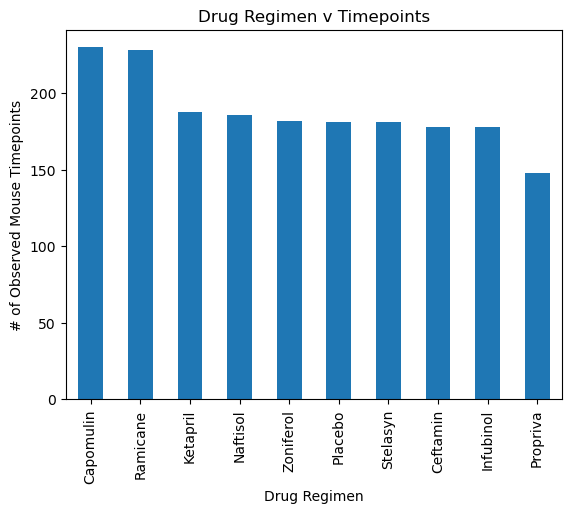

In [88]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

timepoint_count  = drugRegim["Timepoint"].count()
timepoint_count.sort_values(ascending=False, inplace =  True)
timepoint_count.plot(kind = "bar", ylabel = "# of Observed Mouse Timepoints" , title = "Drug Regimen v Timepoints")
plt.show()

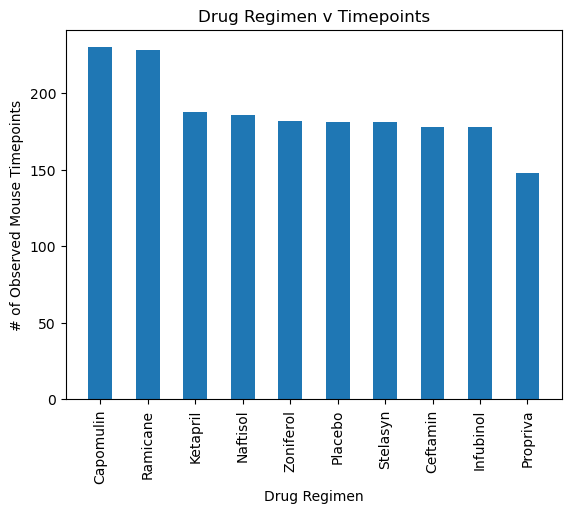

In [89]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = np.arange(len(timepoint_count))
labels = timepoint_count.index
plt.bar(x_axis, timepoint_count, align = "center", width = .5)
plt.xticks(x_axis,labels, rotation = "vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Drug Regimen v Timepoints")
plt.show()

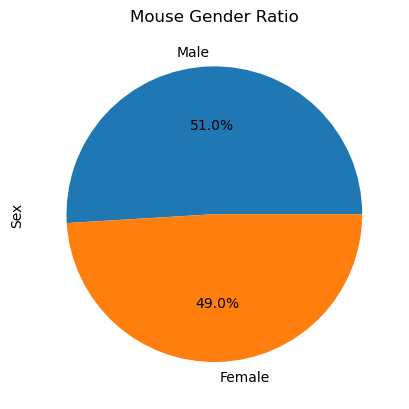

In [90]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_mice = cleanData["Sex"].value_counts()
sex_mice.plot(kind = "pie", title = "Mouse Gender Ratio",autopct="%1.1f%%" )
plt.show()

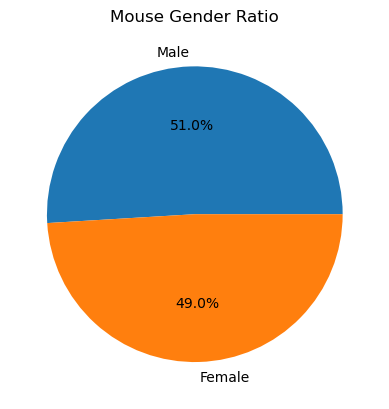

In [91]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_label = sex_mice.index
plt.pie(sex_mice, labels= pie_label, autopct="%1.1f%%")
plt.title("Mouse Gender Ratio")
plt.show()

## Quartiles, Outliers and Boxplots

In [92]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
reduced_data = cleanData.loc[((cleanData["Drug Regimen"] =="Capomulin")|(cleanData["Drug Regimen"] =="Ramicane")|(cleanData["Drug Regimen"] =="Infubinol")|(cleanData["Drug Regimen"] =="Ceftamin"))]
id_regimen = reduced_data.groupby(["Mouse ID"])

# Start by getting the last (greatest) timepoint for each mouse
max_time_pt = pd.DataFrame(id_regimen["Timepoint"].max())

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_results = pd.merge(max_time_pt, cleanData, on = ["Mouse ID","Timepoint"])
final_results

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [93]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = final_results["Drug Regimen"].unique()
treatments

# Create empty list to fill with tumor vol data (for plotting)

drug_dict = {list:[] for list in treatments}


for treatment in treatments:
    
    treatment_name = str(treatment)
    treatment_df = final_results.loc[(final_results["Drug Regimen"]==str(treatment)),"Tumor Volume (mm3)"]
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartile = treatment_df.quantile([.25,.5,.75])    
    iqr = quartile[0.75] - quartile[0.25]
    
    # Determine outliers using upper and lower bounds
    lower_bound = quartile[.25] - (1.5 * iqr )
    upper_bound = quartile[0.75] + (1.5 * iqr)
    outliers = treatment_df.loc[((treatment_df<lower_bound)  
                            | (treatment_df>upper_bound))]
    
    #print outliers, if any
    print("--------------------------------")
    print(f"**{str(treatment_name)} potential outliers: {outliers}")
    
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    for i in treatment_df:
        drug_dict[treatment_name].append(i)


--------------------------------
**Infubinol potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
--------------------------------
**Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
--------------------------------
**Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
--------------------------------
**Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


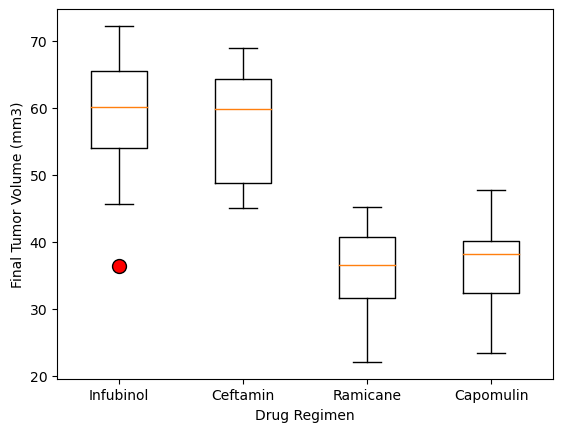

In [94]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1,ax1= plt.subplots()
flierprops = dict(markerfacecolor = "red", markersize = 10)
ax1.boxplot([drug_dict[x]for x in drug_dict], labels = treatments, flierprops = flierprops)
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel("Drug Regimen")
plt.show() 

## Line and Scatter Plots

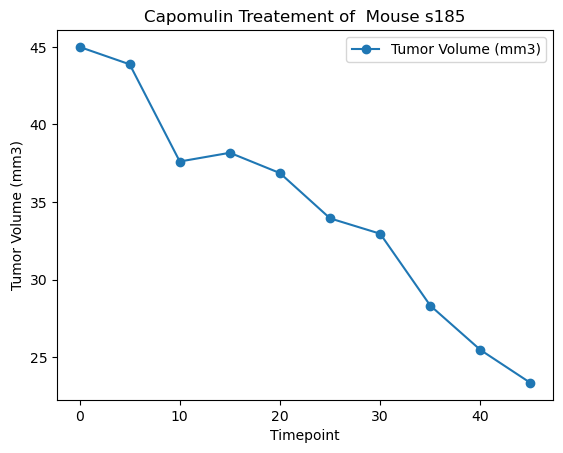

In [95]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

##asks the user for a Drug Regim instead of hardcoding
# drug_regim_input = input("Enter the drug regimen you want to plot [Capomulin,Ramicane,Infubino,Ceftamin]: ")
drug_regim_input = "Capomulin" #hardcoded drug regimen 
cap_data = cleanData.loc[(cleanData["Drug Regimen"] == drug_regim_input)]

##asks the user for a Mouse ID instead of hardcoding
# mouse_id = input(f"Enter Mouse ID from {drug_regim_input} test group: ") 
mouse_id = "s185" ##hardcoded Mouse ID
testMouse = cap_data.loc[(cap_data["Mouse ID"]== mouse_id)]


t_m_tnv = testMouse[["Tumor Volume (mm3)","Timepoint"]].set_index("Timepoint")


t_m_tnv.plot(kind = "line", ylabel = "Tumor Volume (mm3)" , title = f"{drug_regim_input} Treatement of  Mouse {mouse_id}", marker = "o")

plt.show()

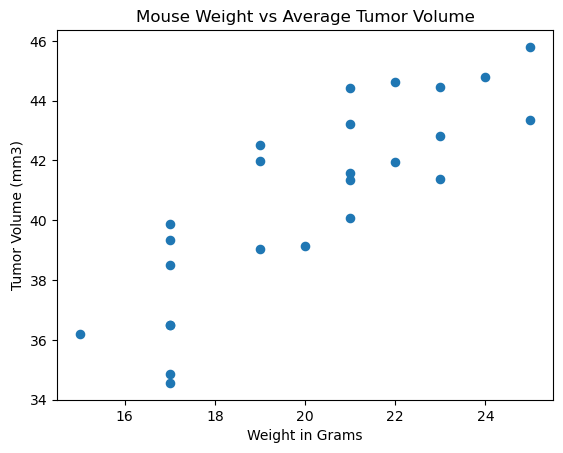

In [96]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
cap_weight_tvolume = pd.DataFrame(cap_data.groupby(["Mouse ID"]).mean(numeric_only = True))
cap_weight_tvolume
cap_weight_tvolume.plot(kind = "scatter", x="Weight (g)", y= "Tumor Volume (mm3)",
                        xlabel = "Weight in Grams", ylabel = "Tumor Volume (mm3)",
                        title = "Mouse Weight vs Average Tumor Volume", s = 35)
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


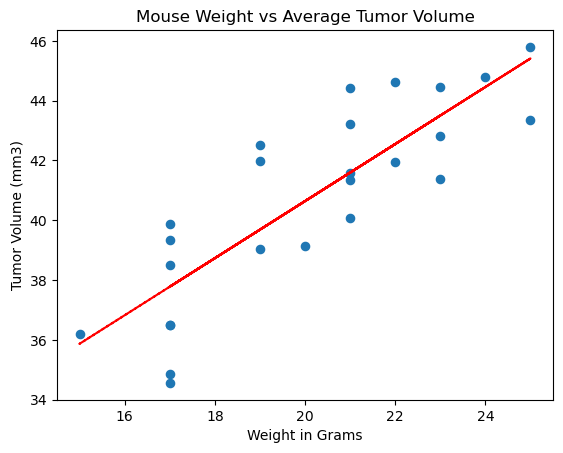

In [97]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy import stats

wv_slope, wv_int, wv_r, wv_p, wv_std_err = stats.linregress(cap_weight_tvolume["Weight (g)"], cap_weight_tvolume["Tumor Volume (mm3)"])
wv_lin_reg = (wv_slope * cap_weight_tvolume["Weight (g)"]) + wv_int

cap_weight_tvolume.plot(kind = "scatter", x="Weight (g)", y= "Tumor Volume (mm3)",
                        xlabel = "Weight in Grams", ylabel = "Tumor Volume (mm3)",
                        title = "Mouse Weight vs Average Tumor Volume", s = 35)

plt.plot(cap_weight_tvolume["Weight (g)"], wv_lin_reg, "--", color = "red")

print(f"The correlation between mouse weight and the average tumor volume is {round(wv_r,2)}")
plt.show()